In [1]:
!pip install -U pymoo

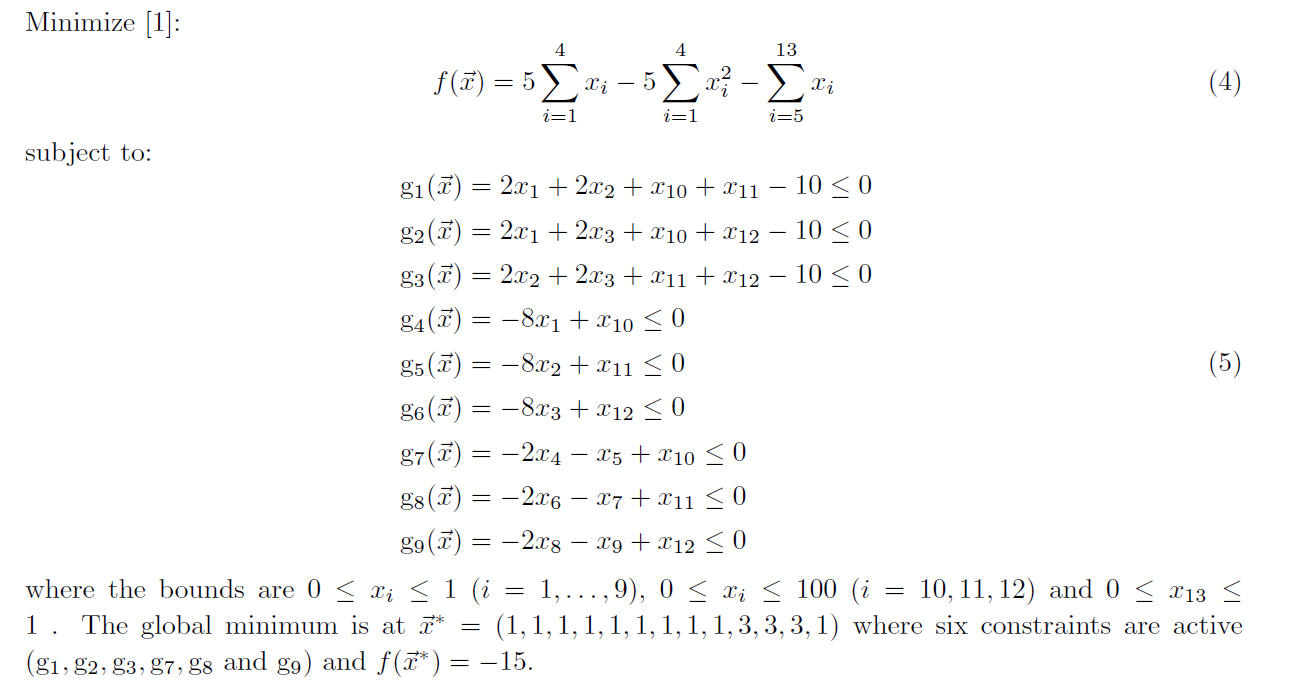

In [2]:
from pymoo.core.problem import Problem
import numpy as np
class G1(Problem):
    def __init__(self):
        n_var = 13
        xl = np.zeros(n_var, dtype=float)
        xu = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 100, 100, 100, 1], dtype=float)
        super().__init__(n_var=n_var,n_obj=1, n_ieq_constr=9, xl=xl, xu=xu, vtype=float)

    def _evaluate(self, x, out, *args, **kwargs):
        x1 = x[:, 0: 4]
        x2 = x[:, 4: 13]

        f = 5 * x1.sum(axis=1) - 5 * (x1 ** 2).sum(axis=1) - x2.sum(axis=1)

        # Constraints
        g1 = 2 * x[:, 0] + 2 * x[:, 1] + x[:, 9] + x[:, 10] - 10
        g2 = 2 * x[:, 0] + 2 * x[:, 2] + x[:, 9] + x[:, 11] - 10
        g3 = 2 * x[:, 1] + 2 * x[:, 2] + x[:, 10] + x[:, 11] - 10
        g4 = -8 * x[:, 0] + x[:, 9]
        g5 = -8 * x[:, 1] + x[:, 10]
        g6 = -8 * x[:, 2] + x[:, 11]
        g7 = -2 * x[:, 3] - x[:, 4] + x[:, 9]
        g8 = -2 * x[:, 5] - x[:, 6] + x[:, 10]
        g9 = -2 * x[:, 7] - x[:, 8] + x[:, 11]

        out["F"] = f
        out["G"] = [g1, g2, g3, g4, g5, g6, g7, g8, g9]

In [3]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.optimize import minimize

problem =G1()

algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

Best solution found: 
X = [1.         1.         1.         1.         1.         1.
 1.         1.         1.         2.99994548 2.98724675 2.99782144
 1.        ]
F = [-14.98501368]
